# **금융경제학**

- 금융경제학 (박기영 저, 시그마프레스) 교재에 사용된 데이터/모형/그래프 관련 작업을 수행하는 python notebook 파일임: https://github.com/FinancialEconomicsPython
- python 코드는 구글 코랩에서 사용하는 것을 기준으로 작성되었음.
- 데이터 파일이 필요한 경우 위치: https://drive.google.com/drive/folders/1sArqUZKnxWtkNtHe31iD1w-2xCVEhTj0?usp=share_link
- date: 2025/3/22, updated: 2026/1/30

# 사전준비
## 수정이 필요한 부분

- 아래 셀에서 BASE에는 본인의 구글 드라이브 경로, key_api_ECOS에는 본인의 한국은행 ECOS open API key를 입력해야 합니다.
  - 한국은행 ECOS open API key 신청은 다음 링크에서 할 수 있습니다: https://ecos.bok.or.kr/api/#/

- UTILS, FIGS의 경우 BASE에서 지정한 폴더 아래 UTILS, FIGS 폴더를 동일하게 만들고 해당 폴더에 있는 파일들을 저장할 경우 수정할 필요 없습니다.



In [1]:
# ============================
# 🎯 사용자별 맞춤 설정 영역
# ============================

# Google Drive 상 Colab 프로젝트 기본 폴더 경로 (각자 환경에 맞게 수정)
BASE = "/content/drive/MyDrive/Colab Notebooks/book_FinancialEconomics"

# 한국은행 ECOS API 인증키 (개인별 발급)
key_api_ECOS = "YOUR_ECOS_API_KEY_HERE"

if ("YOUR_ECOS_API_KEY_HERE" in key_api_ECOS):
    print("⚠️ ECOS API 인증키가 설정되지 않았습니다.")
    print("   'key_api_ECOS'에 본인의 API 키를 입력한 뒤 다시 실행하세요.")
    raise SystemExit

# 서브폴더 지정
UTILS = "/content/resources/utils"   # git clone 경로
FIGS  = os.path.join(BASE, "figures")
os.makedirs(FIGS, exist_ok=True)

## Preamble 및 필요한 라이브러리/함수 불러오기
- PublicDataReader 라이브러리 불러오기
- utils 폴더에 있는 preamble_core.py 불러오기
  - google drive 연결
  - 출력 DPI 조정
- utils 폴더에 있는 plot_utils.py 불러오기
  - plot_dual_axis를 이용해서 y축 왼쪽, 오른쪽 모두 사용하는 그림 그리기
- koreanize_matplotlib 라이브러리: 그림에서 한글 깨짐 방지

In [2]:
# PublicDataReader 라이브러리 불러오기
!pip -q install publicdatareader
from PublicDataReader import Ecos

# ============================
# 📦 Preamble 불러오기
# ============================

from google.colab import drive
drive.mount("/content/drive", force_remount=True)

import sys, os, importlib
if UTILS not in sys.path:
    sys.path.append(UTILS)

# preamble_core 불러오기
from preamble_core import setup_notebook, bind_env, save_fig

# 노트북 공통 환경 설정
setup_notebook(save_dir=FIGS, seaborn_use=True)
bind_env(globals())   # Colab에서도 plt/np/pd 활성화

# Colab 화면 출력용/파일 저장용 DPI 설정
import matplotlib.pyplot as plt
plt.rcParams["figure.dpi"] = 100   # 화면 렌더링
plt.rcParams["savefig.dpi"] = 600  # 파일 저장

# 그래프 그리는 plot_dual_axis() 불러오기
import plot_utils
importlib.reload(plot_utils)
from plot_utils import plot_dual_axis

# koreanize_matplotlib 설치
# 1. 라이브러리 설치 (이미 되어 있다면 생략 가능)
!pip -q install koreanize-matplotlib

# 2. 임포트
import koreanize_matplotlib
import matplotlib.pyplot as plt

Mounted at /content/drive
✅ Notebook environment initialized.
📂 Figures will be saved to: /content/drive/MyDrive/Colab Notebooks/book_FinancialEconomics/figures


## NBER recession dates 불러오기
- utils 폴더의 nber_utils를 통해 NBER recession dates 불러오기

✅ nber_utils ready (functions: load_and_process_nber_data, plot_nber_recession)
✅ NBER recession data loaded successfully.
📅 Number of cycles detected: 34
✅ NBER monthly cycles loaded: 34 periods


,peak,trough
26,1969-12-01,1970-11-01
27,1973-11-01,1975-03-01
28,1980-01-01,1980-07-01
29,1981-07-01,1982-11-01
30,1990-07-01,1991-03-01
31,2001-03-01,2001-11-01
32,2007-12-01,2009-06-01
33,2020-02-01,2020-04-01


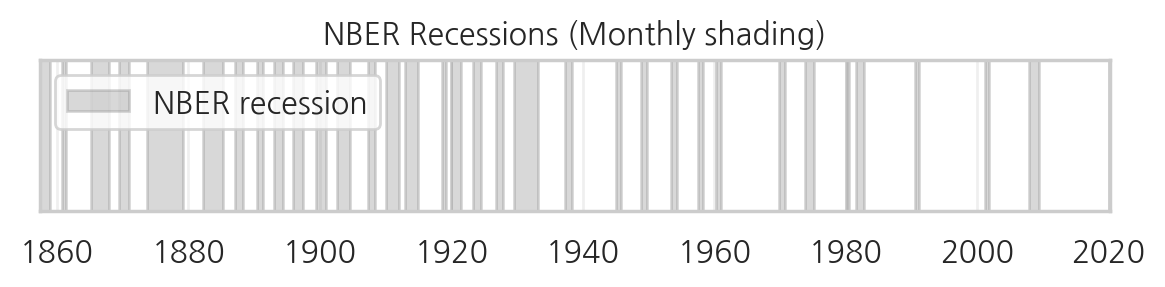

In [3]:
# ============================
# 📊 NBER 경기순환 데이터 로딩
# ============================

import nber_utils

# Colab 전역 네임스페이스에 함수 주입 (load_and_process_nber_data, plot_nber_recession)
if hasattr(nber_utils, "bind_env"):
    nber_utils.bind_env(globals())
else:
    print("⚠️ bind_env() not found in nber_utils (확인 필요).")

# NBER Business Cycle Dating Committee spreadsheet
url = "https://www.nber.org/sites/default/files/2023-03/BCDC_spreadsheet_for_website.xlsx"
NBERm, NBERq = nber_utils.load_and_process_nber_data(url)

print(f"✅ NBER monthly cycles loaded: {len(NBERm)} periods")
display(NBERm.tail(8))

# ============================
# 🖼️ 예시: 경기침체 구간 시각화
# ============================

fig, ax = plt.subplots(figsize=(6, 1.6))
ax.set_xlim(pd.Timestamp("1961-01-01"), pd.Timestamp("2025-12-31"))
ax.set_ylim(0, 1)
ax.set_yticks([])

plot_nber_recession(ax, NBERm, clip_to_xlim=True, keep_xlim=True, label="NBER recession")

ax.set_title("NBER Recessions (Monthly shading)", fontsize=11)
ax.grid(True, alpha=0.3)
ax.legend(loc="upper left")
plt.tight_layout()
plt.show()

# END OF PREAMBLE

# Main

## 연방기금금리: target, effective

In [4]:
# Federal Funds Target Rate (DISCONTINUED) (DFEDTAR)
# federal funds effective rate (EFFR), daily

var_list = ['DFEDTAR', 'EFFR']
start = date(1996,1,1)
end = date(2009,3,31)

df_ffr = pdr.get_data_fred(var_list, start=start, end=end)
print(df_ffr.head())
print(df_ffr.tail(3))

print(df_ffr.info())

            DFEDTAR  EFFR
DATE                     
1996-01-01    5.500   NaN
1996-01-02    5.500   NaN
1996-01-03    5.500   NaN
1996-01-04    5.500   NaN
1996-01-05    5.500   NaN
            DFEDTAR  EFFR
DATE                     
2009-03-27      NaN 0.150
2009-03-30      NaN 0.160
2009-03-31      NaN 0.160
<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 4809 entries, 1996-01-01 to 2009-03-31
Data columns (total 2 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   DFEDTAR  4733 non-null   float64
 1   EFFR     2192 non-null   float64
dtypes: float64(2)
memory usage: 112.7 KB
None


Saving figure → /content/drive/MyDrive/Colab Notebooks/book_FinancialEconomics/figures/ffr_target_effective.png


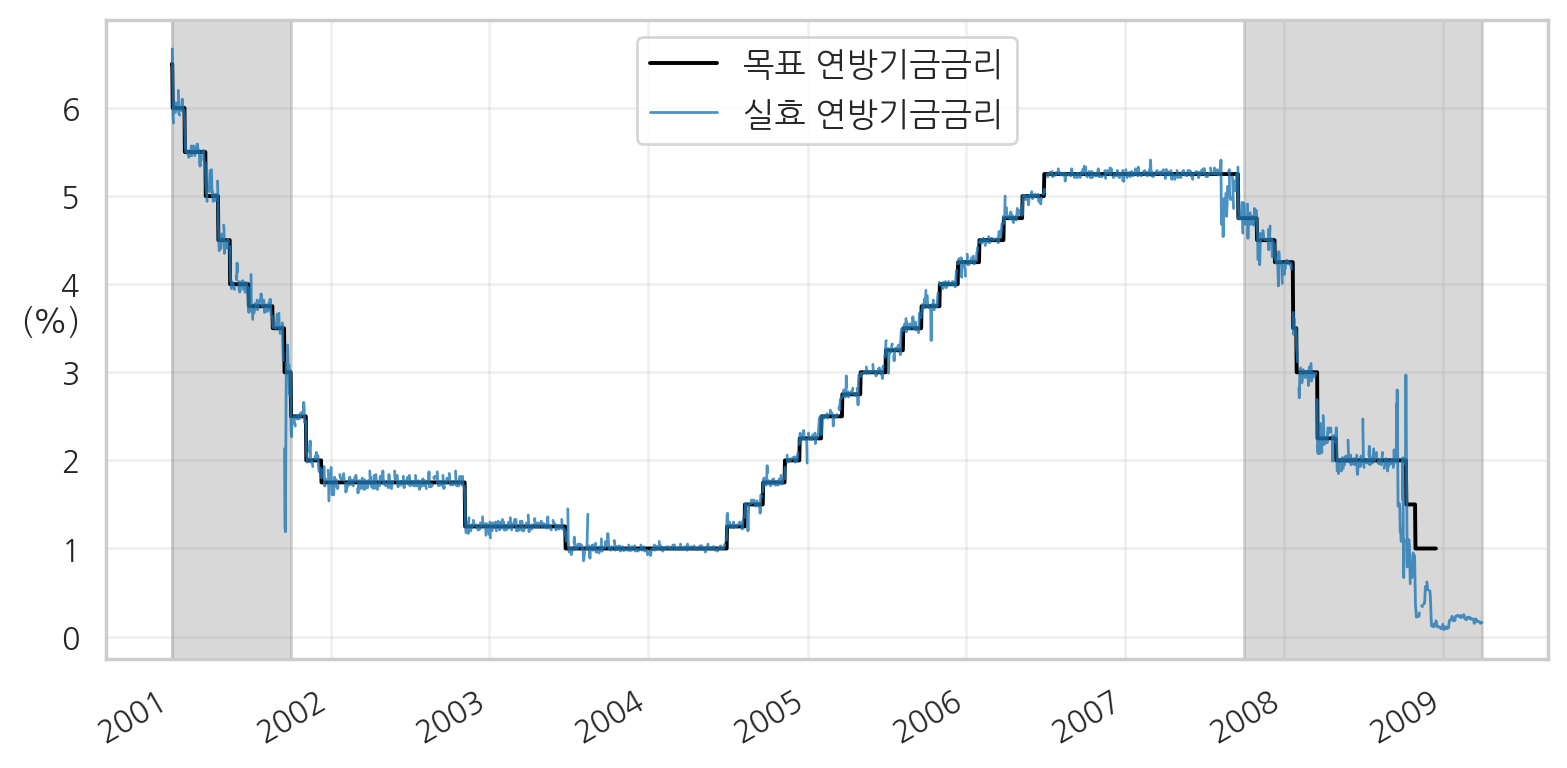

In [5]:
start_date = 2001
end_date   = 2009

fig, ax = plt.subplots(figsize=(8,4))

# -----------------------------
# Lines
# -----------------------------
df_ffr.loc[str(start_date):str(end_date), 'DFEDTAR'] \
    .plot(ax=ax, color='black', linewidth=1.4,
          label='목표 연방기금금리')

df_ffr.loc[str(start_date):str(end_date), 'EFFR'] \
    .plot(ax=ax, color='tab:blue', linewidth=1, alpha=0.8,
          label='실효 연방기금금리')

# -----------------------------
# NBER recessions
# -----------------------------
plot_nber_recession(ax, NBERq)

# -----------------------------
# Formatting
# -----------------------------
ax.legend(fontsize=12, loc='upper center')
ax.set_xlabel('')
ax.set_ylabel('(%)', rotation=0)

ax.yaxis.set_major_formatter(
    mpl.ticker.StrMethodFormatter('{x:,.0f}')
)

ax.grid(True)
ax.margins(x=0)

save_fig('ffr_target_effective')
plt.show()


## 재할인대출, 기간입찰대출(TAF)
- Assets: Liquidity and Credit Facilities: Loans: Primary Credit: Wednesday Level (WLCFLPCL)

In [6]:
# Total Borrowings from the Federal Reserve (BORROW)
# Total Borrowings of Depository Institutions from the Federal Reserve excluding Term Auction Credit (DISCONTINUED) (DISCBORR)
# Term Auction Credit (DISCONTINUED) (TERMAUC)
# Reserves of Depository Institutions: Total (TOTRESNS)

var_list = ['BORROW','DISCBORR','TERMAUC','TOTRESNS']
start = date(1970,1,1)
end = date(2024,12,31)

df_disc = pdr.get_data_fred(var_list, start=start, end=end)
print(df_disc.head())
print(df_disc.tail(3))

df_disc['BORROW'] = df_disc['BORROW'].div(1000)

print(df_disc.info())

              BORROW  DISCBORR  TERMAUC  TOTRESNS
DATE                                             
1970-01-01   959.500     0.959      NaN    28.900
1970-02-01 1,080.300     1.080      NaN    27.900
1970-03-01   897.800     0.898      NaN    27.500
1970-04-01   845.200     0.845      NaN    28.100
1970-05-01   967.500     0.968      NaN    27.900
               BORROW  DISCBORR  TERMAUC  TOTRESNS
DATE                                              
2024-10-01 68,896.000       NaN      NaN 3,211.600
2024-11-01 35,456.500       NaN      NaN 3,256.800
2024-12-01 15,917.300       NaN      NaN 3,240.400
<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 660 entries, 1970-01-01 to 2024-12-01
Freq: MS
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   BORROW    660 non-null    float64
 1   DISCBORR  608 non-null    float64
 2   TERMAUC   41 non-null     float64
 3   TOTRESNS  660 non-null    float64
dtypes: float64(4)
memory usa

In [7]:
df_disc.loc[~df_disc['TERMAUC'].isna()].index.min()

Timestamp('2007-12-01 00:00:00')

Saving figure → /content/drive/MyDrive/Colab Notebooks/book_FinancialEconomics/figures/ts_discount.png


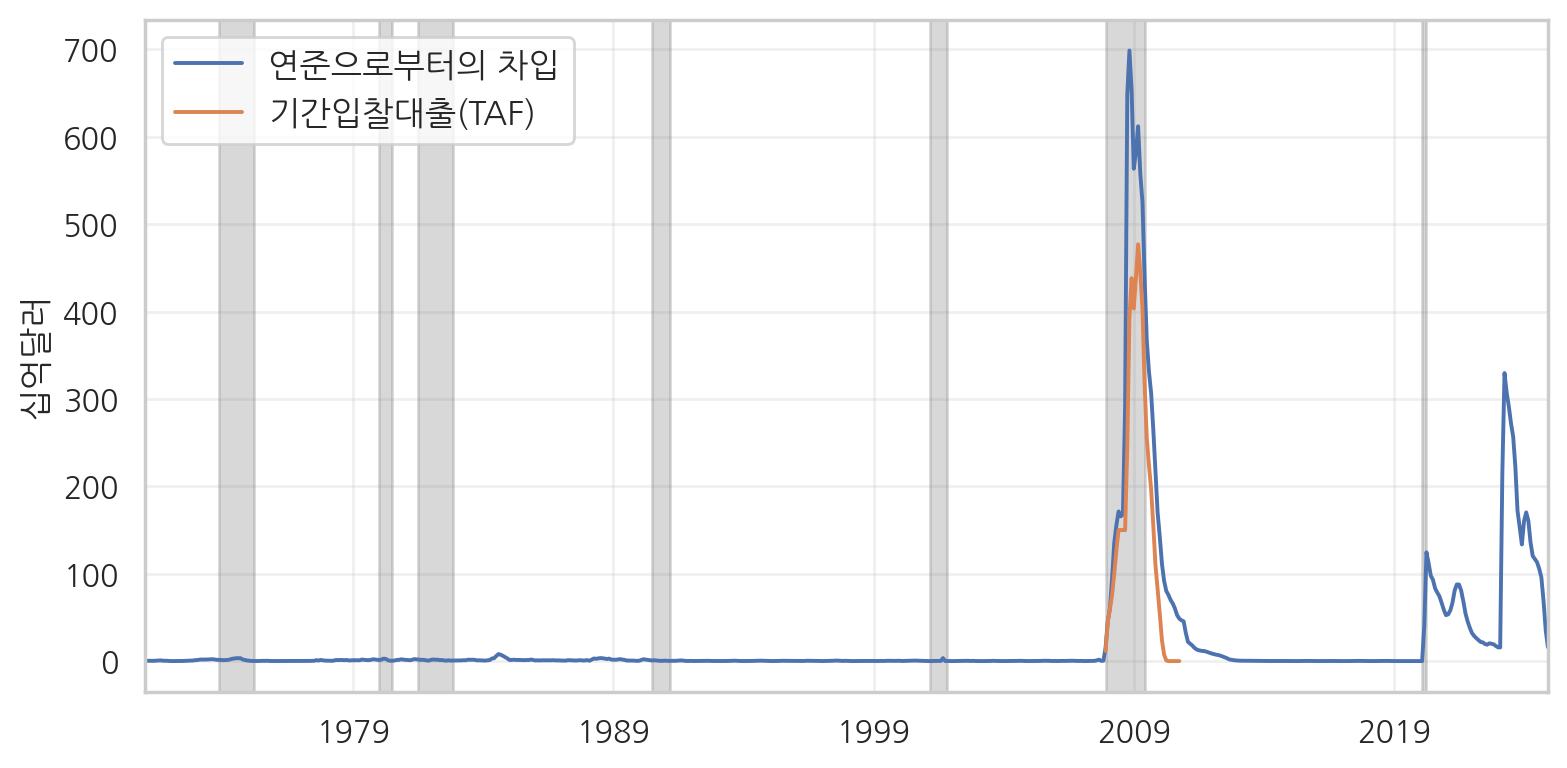

In [8]:
start_date = 1971
end_date   = 2024

fig, ax = plt.subplots(figsize=(8,4))

df_disc.loc[str(start_date):str(end_date), 'BORROW'] \
    .plot(ax=ax, linewidth=1.4, label='연준으로부터의 차입')

df_disc.loc['2007-12':'2010-10', 'TERMAUC'] \
    .plot(ax=ax, linewidth=1.4, label='기간입찰대출(TAF)')

# Plot recessions
#plot_nber_recession(ax, NBERm, clip_to_xlim=False, keep_xlim=True)
plot_nber_recession(ax, NBERm)

ax.legend(fontsize=12, loc='upper left')
ax.set_xlabel('')
ax.set_ylabel('십억달러')

ax.yaxis.set_major_formatter(mpl.ticker.StrMethodFormatter('{x:,.0f}'))
ax.grid(True)
ax.margins(x=0)

save_fig('ts_discount')
plt.show()


## 재할인대출 금리 vs. 연방기금 금리

In [9]:
# Federal Funds Effective Rate (FEDFUNDS)
# Interest Rates, Discount Rate for United States (INTDSRUSM193N)

var_list = ['FEDFUNDS', 'INTDSRUSM193N']
start = date(1981,1,1)
end = date(2024,3,31)

df_rate = pdr.get_data_fred(var_list, start=start, end=end)
print(df_rate.head())
print(df_rate.tail(3))

print(df_rate.info())

            FEDFUNDS  INTDSRUSM193N
DATE                               
1981-01-01    19.080         13.000
1981-02-01    15.930         13.000
1981-03-01    14.700         13.000
1981-04-01    15.720         13.000
1981-05-01    18.520         13.870
            FEDFUNDS  INTDSRUSM193N
DATE                               
2024-01-01     5.330            NaN
2024-02-01     5.330            NaN
2024-03-01     5.330            NaN
<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 519 entries, 1981-01-01 to 2024-03-01
Freq: MS
Data columns (total 2 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   FEDFUNDS       519 non-null    float64
 1   INTDSRUSM193N  488 non-null    float64
dtypes: float64(2)
memory usage: 12.2 KB
None


Saving figure → /content/drive/MyDrive/Colab Notebooks/book_FinancialEconomics/figures/ffr_discount.png


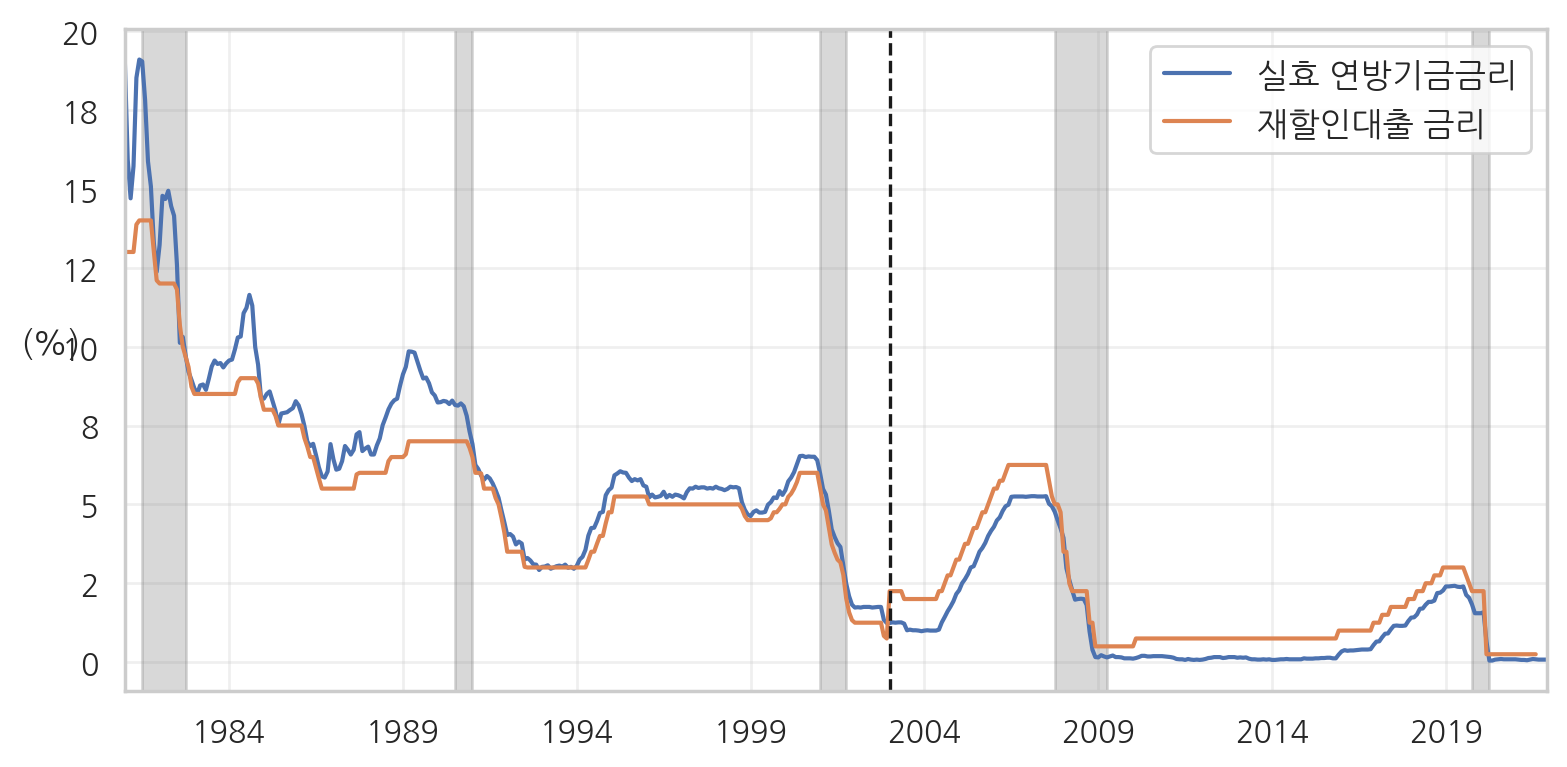

In [11]:
start_date = 1971
end_date = 2021

ax = df_rate.loc[str(start_date):str(end_date),:].plot(figsize=(8,4))
plt.legend(labels=['실효 연방기금금리','재할인대출 금리'], fontsize=12, loc='upper right')
plt.xlabel('')
plt.ylabel('(%)', rotation=0)
# Plot recessions
plot_nber_recession(ax, NBERq)

# Add vertical line for 2003
plt.axvline(pd.Timestamp('2003-01-01'), color='k', linestyle='--', linewidth=1.2)

ax.yaxis.set_major_formatter(mpl.ticker.StrMethodFormatter('{x:,.0f}'))
ax.grid(True)

save_fig('ffr_discount')

## 인플레이션: 뉴질랜드, 영국, 캐나다, 스웨덴, 핀란드

In [12]:
# Inflation, consumer prices for New Zealand (FPCPITOTLZGNZL)
# Inflation, consumer prices for Canada (FPCPITOTLZGCAN)
# Inflation, consumer prices for the United Kingdom (FPCPITOTLZGGBR)
# Inflation, consumer prices for Sweden (FPCPITOTLZGSWE)
# Inflation, consumer prices for Finland (FPCPITOTLZGFIN)

var_list = ['FPCPITOTLZGNZL', 'FPCPITOTLZGCAN', 'FPCPITOTLZGGBR','FPCPITOTLZGSWE','FPCPITOTLZGFIN']
start = date(1981,1,1)
end = date(2024,12,31)

df_inf = pdr.get_data_fred(var_list, start=start, end=end)
print(df_inf.head())
print(df_inf.tail(3))

print(df_inf.info())

            FPCPITOTLZGNZL  FPCPITOTLZGCAN  FPCPITOTLZGGBR  FPCPITOTLZGSWE  \
DATE                                                                         
1981-01-01          15.370          12.472          11.877          12.104   
1982-01-01          16.164          10.769           8.599           8.589   
1983-01-01           7.341           5.864           4.609           8.873   
1984-01-01           6.171           4.305           4.961           8.044   
1985-01-01          15.418           3.962           6.071           7.373   

            FPCPITOTLZGFIN  
DATE                        
1981-01-01          11.306  
1982-01-01           9.585  
1983-01-01           8.366  
1984-01-01           7.068  
1985-01-01           5.196  
            FPCPITOTLZGNZL  FPCPITOTLZGCAN  FPCPITOTLZGGBR  FPCPITOTLZGSWE  \
DATE                                                                         
2022-01-01           7.172           6.803           7.922           8.369   
2023-01-01      

Saving figure → /content/drive/MyDrive/Colab Notebooks/book_FinancialEconomics/figures/start_inf_targeting.png


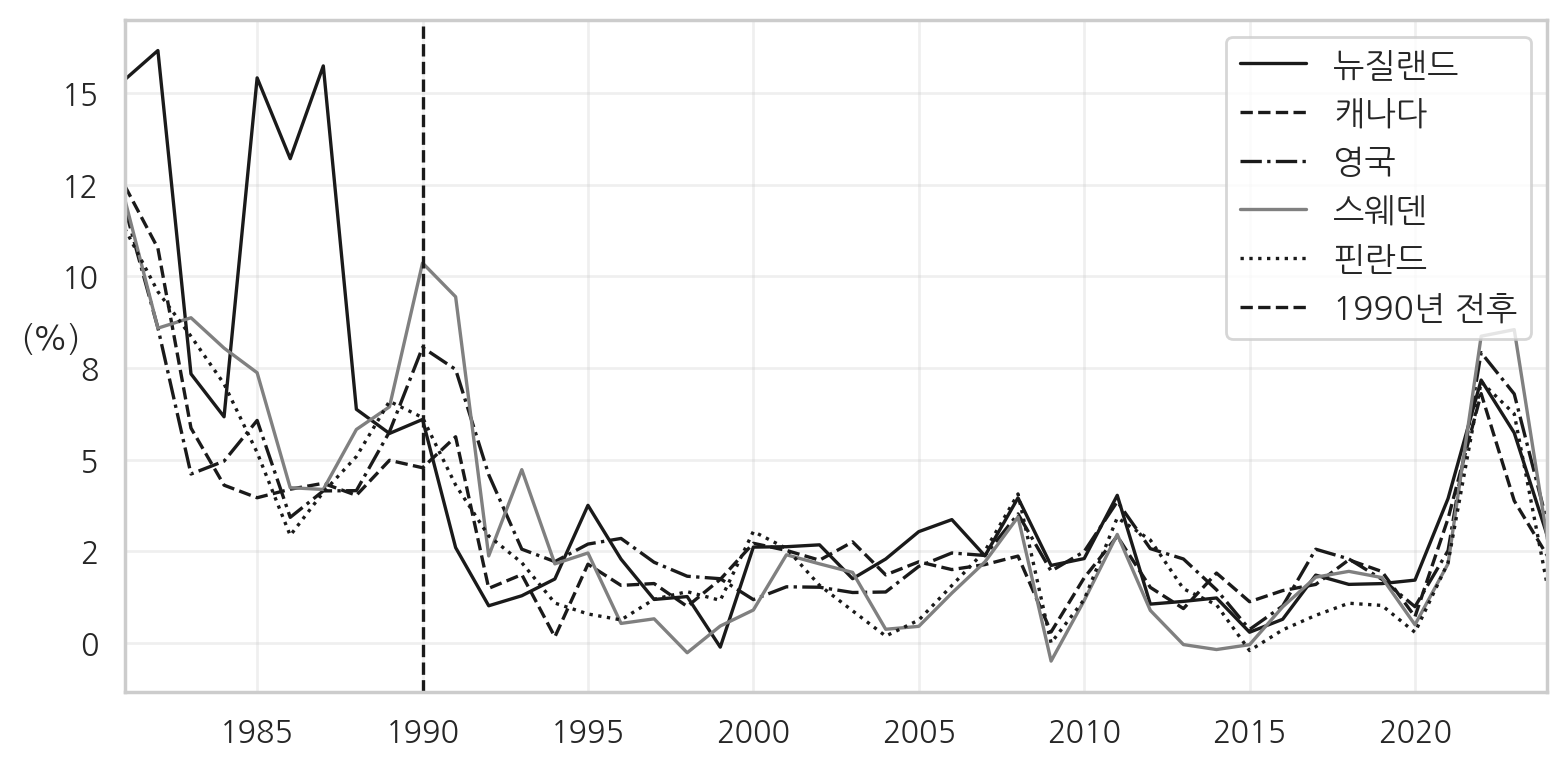

In [13]:
start_date = 1981
end_date   = 2024

fig, ax = plt.subplots(figsize=(8,4))

# -----------------------------
# Inflation series
# -----------------------------
df_inf.loc[str(start_date):str(end_date), 'FPCPITOTLZGNZL'] \
    .plot(ax=ax, color='k', linewidth=1.2, label='뉴질랜드')

df_inf.loc[str(start_date):str(end_date), 'FPCPITOTLZGCAN'] \
    .plot(ax=ax, color='k', linestyle='--', linewidth=1.2, label='캐나다')

df_inf.loc[str(start_date):str(end_date), 'FPCPITOTLZGGBR'] \
    .plot(ax=ax, color='k', linestyle='-.', linewidth=1.2, label='영국')

df_inf.loc[str(start_date):str(end_date), 'FPCPITOTLZGSWE'] \
    .plot(ax=ax, color='gray', linewidth=1.2, label='스웨덴')

df_inf.loc[str(start_date):str(end_date), 'FPCPITOTLZGFIN'] \
    .plot(ax=ax, color='k', linestyle=':', linewidth=1.2, label='핀란드')

# -----------------------------
# Vertical line (Inflation targeting start)
# -----------------------------
ax.axvline(pd.Timestamp('1990-03'), color='k', linestyle='--',
           linewidth=1.2, label='1990년 전후')

# -----------------------------
# Formatting
# -----------------------------
ax.legend(fontsize=12, loc='upper right')
ax.set_xlabel('')
ax.set_ylabel('(%)', rotation=0)

ax.yaxis.set_major_formatter(
    mpl.ticker.StrMethodFormatter('{x:,.0f}')
)

ax.grid(True)
ax.margins(x=0)

save_fig('start_inf_targeting')
plt.show()

## 인플레이션 목표제 vs. 물가수준 목표제

Saving figure → /content/drive/MyDrive/Colab Notebooks/book_FinancialEconomics/figures/IT.png


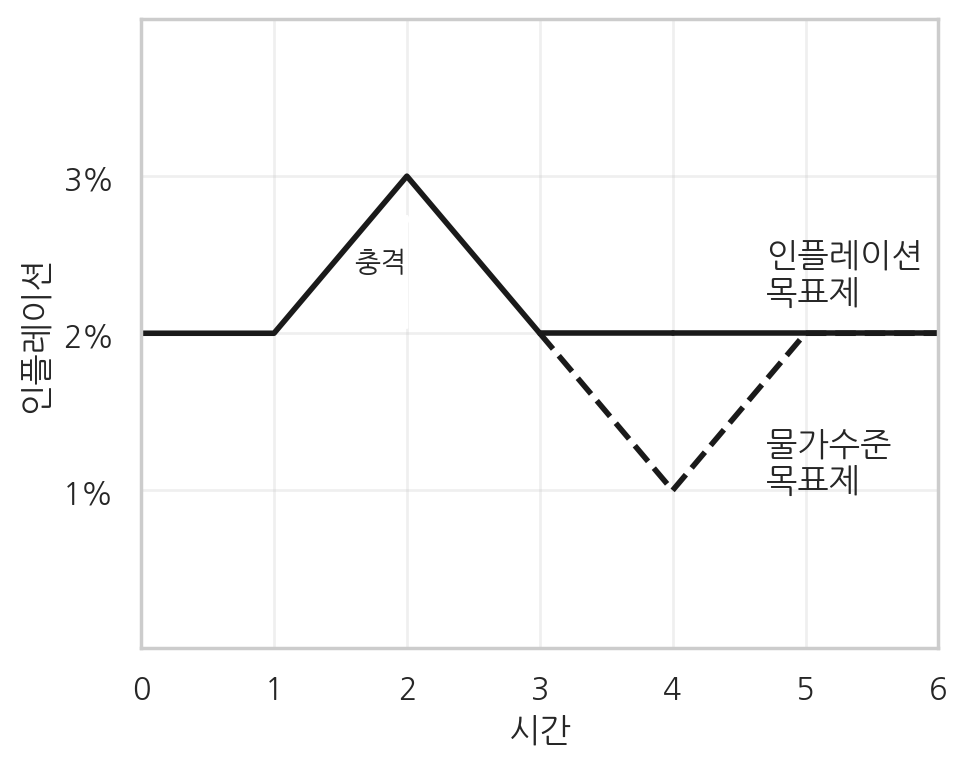

In [15]:
# First Figure: Inflation Rate
plt.figure(figsize=(5, 4))
time1 = np.array([0, 1, 2, 3, 4, 5, 6])
inflation_target = np.array([2, 2, 3, 2, 2, 2, 2])
price_level_target = np.array([2, 2, 3, 2, 1, 2, 2])

# Plot lines for first graph
plt.plot(time1[:4], inflation_target[:4], 'k-', linewidth=2)
plt.plot(time1[3:5], inflation_target[3:5], 'k-', linewidth=2)
plt.plot(time1[4:], inflation_target[4:], 'k-', linewidth=2)
plt.plot(time1[3:5], price_level_target[3:5], 'k--', linewidth=2)
plt.plot(time1[4:], price_level_target[4:], 'k--', linewidth=2)

# Add labels for first plot
plt.xlabel('시간')
plt.ylabel('인플레이션')
plt.ylim(0, 4)
plt.xlim(0, 6)
plt.xticks(range(7))
plt.yticks([1, 2, 3])
plt.gca().yaxis.set_major_formatter(plt.FuncFormatter(lambda x, p: f'{int(x)}%'))

# Add text annotations for first plot
plt.text(4.7, 2.2, '인플레이션\n목표제', fontsize=12)
plt.text(4.7, 1.0, '물가수준\n목표제', fontsize=12)
plt.text(1.6, 2.4, '충격', fontsize=10)
plt.annotate('', xy=(2, 2.8), xytext=(2, 2),
            arrowprops=dict(arrowstyle='->'))

plt.tight_layout()
save_fig('IT')
plt.show()

Saving figure → /content/drive/MyDrive/Colab Notebooks/book_FinancialEconomics/figures/PLT.png


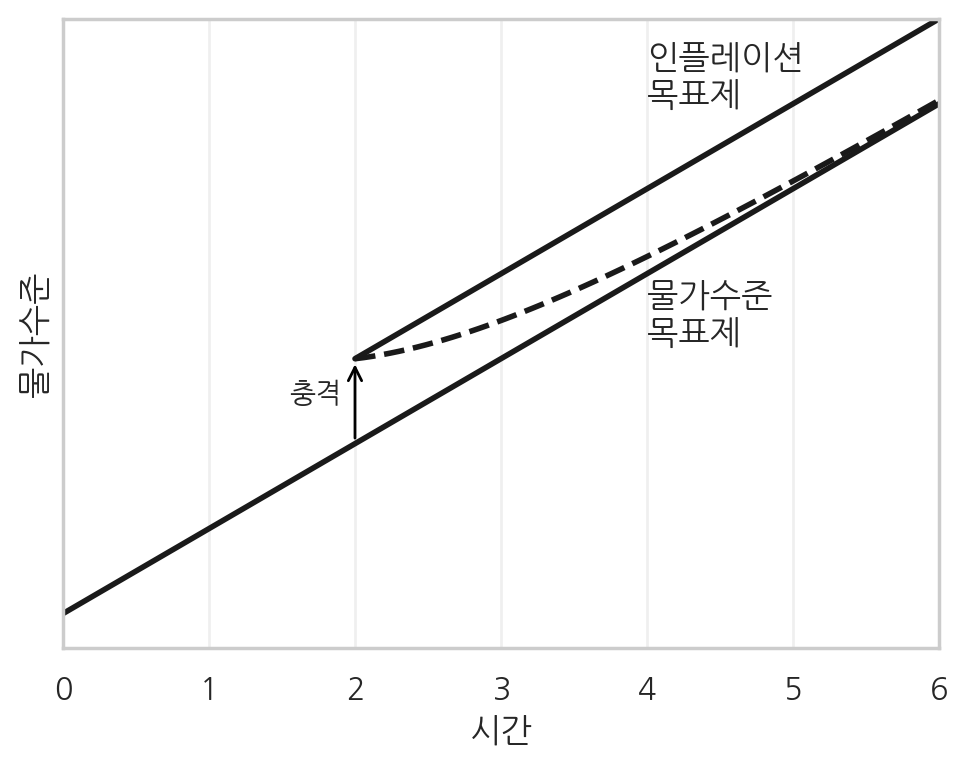

In [17]:
# Second Figure: Price Level
plt.figure(figsize=(5,4))

# Create time points
time = np.linspace(0, 6, 100)

# Create base trend line (price-level targeting)
base_trend = 0.5 * time + 1

# Create the diverging trends after shock point
shock_point = 2
shock_index = int(len(time) * shock_point/6)

# Inflation targeting line (continues higher after shock)
inflation_target = np.concatenate([
    base_trend[:shock_index],
    base_trend[shock_index:] + 0.5
])

# Price-level targeting line (gradually returns to trend)
price_level_target = np.concatenate([
    base_trend[:shock_index],
    base_trend[shock_index:] + 0.5 * np.exp(-0.8 * (time[shock_index:] - shock_point))
])

# Plot the lines
plt.plot(time, base_trend, 'k-', linewidth=2)
plt.plot(time[shock_index:], inflation_target[shock_index:], 'k-', linewidth=2)
plt.plot(time[shock_index:], price_level_target[shock_index:], 'k--', linewidth=2)

# Add shock arrow
arrow_x = shock_point
arrow_base_y = base_trend[shock_index]
arrow_height = 0.5
plt.annotate('', xy=(arrow_x, arrow_base_y + arrow_height),
            xytext=(arrow_x, arrow_base_y),
            arrowprops=dict(arrowstyle='->', color='black'))
plt.text(arrow_x - 0.45, arrow_base_y + arrow_height/2, '충격', fontsize=10)

# Add labels for targeting types
plt.text(4, 4, '인플레이션\n목표제', fontsize=12)
plt.text(4, 2.6, '물가수준\n목표제', fontsize=12)

# Set up axes and labels
plt.xlabel('시간')
plt.ylabel('물가수준')
plt.xlim(0, 6)
plt.ylim(0.8, 4.5)
plt.xticks(range(0, 7))

# Remove both ticks and numbers from y-axis while keeping the label
plt.gca().yaxis.set_ticklabels([])
plt.gca().yaxis.set_ticks([])

plt.tight_layout()
save_fig('PLT')
plt.show()

## 테일러 준칙

In [18]:
# Federal Funds Effective Rate (FEDFUNDS)
# Real Gross Domestic Product (GDPC1)
# Gross Domestic Product: Implicit Price Deflator (GDPDEF)
# Real Potential Gross Domestic Product (GDPPOT)

var_list = ['FEDFUNDS', 'GDPC1', 'GDPDEF', 'GDPPOT']
start = date(1960,1,1)
end = date(2024,12,31)

df_taylor = pdr.get_data_fred(var_list, start=start, end=end)
print(df_taylor.head())
print(df_taylor.tail(3))

# make it quarterly
df_taylor = df_taylor.dropna()
print(df_taylor.info())

            FEDFUNDS     GDPC1  GDPDEF    GDPPOT
DATE                                            
1960-01-01     3.990 3,517.181  15.428 3,493.326
1960-02-01     3.970       NaN     NaN       NaN
1960-03-01     3.840       NaN     NaN       NaN
1960-04-01     3.920 3,498.246  15.467 3,529.388
1960-05-01     3.850       NaN     NaN       NaN
            FEDFUNDS      GDPC1  GDPDEF     GDPPOT
DATE                                              
2024-10-01     4.830 23,586.542 126.450 23,113.340
2024-11-01     4.640        NaN     NaN        NaN
2024-12-01     4.480        NaN     NaN        NaN
<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 260 entries, 1960-01-01 to 2024-10-01
Freq: 3MS
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   FEDFUNDS  260 non-null    float64
 1   GDPC1     260 non-null    float64
 2   GDPDEF    260 non-null    float64
 3   GDPPOT    260 non-null    float64
dtypes: float64(4)
memory usage: 10

In [19]:
# 인플레이션 계산
df_taylor['inflation'] = 100*df_taylor['GDPDEF'].pct_change(4)

# output gap 계산
df_taylor['output gap'] = 100*(df_taylor['GDPC1']-df_taylor['GDPPOT'])/df_taylor['GDPPOT']

# Taylor rule
alpha_pi = 0.5
alpha_y = 0.5
df_taylor['taylor rule'] = 2 + df_taylor['inflation'] + alpha_pi*(df_taylor['inflation']-2) + alpha_y*df_taylor['output gap']

Saving figure → /content/drive/MyDrive/Colab Notebooks/book_FinancialEconomics/figures/ffr_Taylor.png


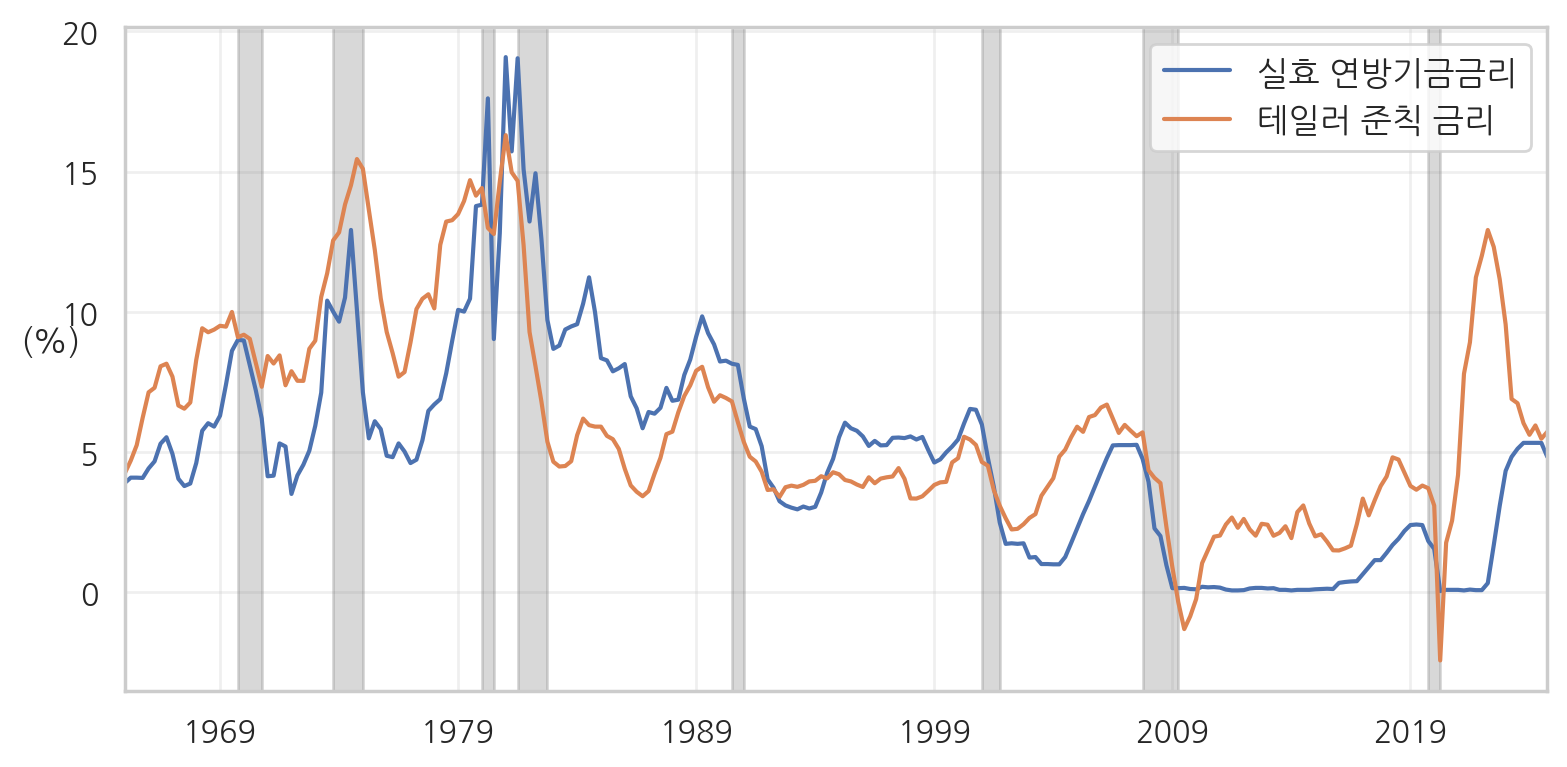

In [23]:
start_date = 1965
end_date = 2024

ax = df_taylor.loc[str(start_date):str(end_date),['FEDFUNDS','taylor rule']].plot(figsize=(8,4))
plt.legend(labels=['실효 연방기금금리','테일러 준칙 금리'], fontsize=12, loc='upper right')
plt.xlabel('')
plt.ylabel('(%)', rotation=0)
# Plot recessions
plot_nber_recession(ax, NBERq)

ax.yaxis.set_major_formatter(mpl.ticker.StrMethodFormatter('{x:,.0f}'))
ax.grid(True)

save_fig('ffr_Taylor')